# Planar data classification with one hidden layer
Welcome to your week 3 programming assignment. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression.

You will learn how to:
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh
- Compute the cross entropy loss
- Implement forward and backward propagation

#### 1 - Packages
Let's first import all the packages that you will need during this assignment.
- numpy is the fundamental package for scientific computing with Python.
- sklearn provides simple and efficient tools for data mining and data analysis.
- matplotlib is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

In [15]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

np.random.seed(1) # set a seed so that the results are consistent

#### 2 - Dataset
First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables X and Y.

`plt.scatter(X[0, :], X[1, :], c= Y.ravel(), s=40, cmap=plt.cm.Spectral)`

In [3]:
X, Y = load_planar_dataset()

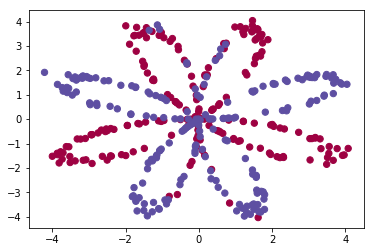

In [12]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c= Y.ravel(), s=40, cmap=plt.cm.Spectral)

#### 3 - Simple Logistic Regression
Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [13]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [17]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


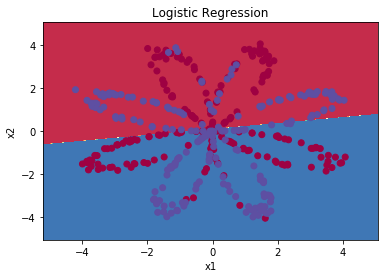

In [18]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

#### 4 - Neural Network model
Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

Here is our model: 

Mathematically:

For one example $x^{(i)}$: $$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$$$y^{(i)}_{prediction} = \begin{cases} 1 &amp; \mbox{if } a^{[2](i)} &gt; 0.5 \\ 0 &amp; \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: $$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large \right) \small \tag{6}$$

Reminder: The general methodology to build a Neural Network is to:

1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call nn_model(). Once you've built nn_model() and learnt the right parameters, you can make predictions on new data.

#### 4.1 - Defining the neural network structure
Exercise: Define three variables:

- n_x: the size of the input layer
- n_h: the size of the hidden layer (set this to 4) 
- n_y: the size of the output layer

Hint: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [19]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    return X.shape[0], 4, Y.shape[0]

In [21]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


#### 4.2 - Initialize the model's parameters
Exercise: Implement the function initialize_parameters().

Instructions:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values.
- Use: np.random.randn(a,b) * 0.01 to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros.
- Use: np.zeros((a,b)) to initialize a matrix of shape (a,b) with zeros.

In [117]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    params = {}
    
    sizes = [n_x, n_h, n_y]
    for i in range(1, len(sizes)):
        params['W' + str(i)] = np.random.randn(sizes[i  - 1], sizes[i]) * 0.01
        params['b' + str(i)] = np.zeros((sizes[i], 1))
        
    return params

In [118]:
n_x, n_h, n_y = initialize_parameters_test_case()

params = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))

W1 = [[-0.00416758 -0.00056267 -0.02136196  0.01640271]
 [-0.01793436 -0.00841747  0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952]
 [-0.00909008]
 [ 0.00551454]
 [ 0.02292208]]
b2 = [[0.]]


#### 4.3 - The Loop
Question: Implement forward_propagation().

Instructions:
- Look above at the mathematical representation of your classifier.
- You can use the function sigmoid(). It is built-in (imported) in the notebook.
- You can use the function np.tanh(). It is part of the numpy library.
- The steps you have to implement are:
- Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters()) by using parameters\[".."\].
- Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [130]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###

    Z1 = W1.T @ X + b1
    A1 = np.tanh(Z1)
    Z2 = W2.T @ A1 + b2
    A2 = sigmoid(Z2)
    
    cache = {}
    cache['A1'] = A1
    cache['A2'] = A2
    return A2, cache

In [120]:
X_assess, parameters = forward_propagation_test_case()
parameters['W1'] = parameters['W1'].T
parameters['W2'] = parameters['W2'].T
A2, cache = forward_propagation(X_assess, parameters)
# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['A1']), np.mean(A2))

0.09199904522700109 0.21287768171914198


Now that you have computed $A^{[2]}$ (in the Python variable "A2"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$
Exercise: Implement compute_cost() to compute the value of the cost $J$.

Instructions:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented $$- \sum\limits_{i=0}^{m} y^{(i)}\log(a^{[2](i)})$$
- logprobs = np.multiply(np.log(A2),Y)
- cost = - np.sum(logprobs)                # no need to use a for loop!
- (you can use either np.multiply() and then np.sum() or directly np.dot()).

In [111]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    return np.mean(- np.sum(np.log(A2) * Y + np.log(1 - A2) * (1 - Y), axis = 0))

In [113]:
A2, Y_assess, _ = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


#### Instructions
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.

In [139]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(params, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    grads = {}
    m = X.shape[1]
    
    delta2 = cache['A2'] - Y
    grads['W2'] = cache['A1'] @ delta2.T / m
    grads['b2'] = np.mean(delta2, axis = 1, keepdims=True)

    delta1 = (params['W2'] @ delta2) * (1 - cache['A1'] ** 2)
    grads['W1'] = X @ delta1.T / m
    grads['b1'] = np.mean(delta1, axis = 1, keepdims = True)

    return grads

In [122]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
parameters['W2'] = parameters['W2'].T
parameters['W1'] = parameters['W1'].T
grads = backward_propagation(parameters, cache, X_assess, Y_assess)

In [123]:
print ("dW1 = "+ str(grads["W1"]))
print ("db1 = "+ str(grads["b1"]))
print ("dW2 = "+ str(grads["W2"]))
print ("db2 = "+ str(grads["b2"]))

dW1 = [[ 0.00301023  0.00257968 -0.00156892 -0.00652037]
 [-0.00747267 -0.00641288  0.003893    0.01618243]]
db1 = [ 0.00176201  0.00150995 -0.00091736 -0.00381422]
dW2 = [[ 0.00078841]
 [ 0.01765429]
 [-0.00084166]
 [-0.01022527]]
db2 = [-0.16655712]


#### Question: 
Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

General gradient descent rule: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

Illustration: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

In [140]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, lr=1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    keywords = ['W1', 'b1', 'W2', 'b2']

    for k in keywords:
        parameters[k] = parameters[k]- lr * grads[k]
    
    return parameters

In [125]:
parameters, grads = update_parameters_test_case()
grads['W1'] = grads['dW1']
grads['b1'] = grads['db1']
grads['W2'] = grads['dW2']
grads['b2'] = grads['db2']
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


#### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model()
Question: Build your neural network model in nn_model().

Instructions: The neural network model has to use the previous functions in the right order.

In [146]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    x_n = X.shape[0]
    y_n = Y.shape[0]
    params = initialize_parameters(x_n, n_h, y_n)
    
    costs = []
    
    for i in range(num_iterations):
        A2, cache = forward_propagation(X, params)
        grads = backward_propagation(params, cache, X, Y)
        params = update_parameters(params, grads, lr=1.2)
        if i % 500 == 0:
            cost = compute_cost(A2, Y)
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" % (i, cost))
    
    return params

In [141]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.64076278 -0.53533087 -0.7066465   0.85140334]
 [-1.20403551  1.00543387  1.2938997  -1.55623899]]
b1 = [[-0.28339687]
 [ 0.20537663]
 [ 0.31770639]
 [-0.40869433]]
W2 = [[ 2.3832692 ]
 [-1.70821539]
 [-2.79018035]
 [ 4.23022575]]
b2 = [[0.20452488]]


#### 4.5 Predictions
Question: Use your model to predict by building predict(). Use forward propagation to predict results.

Reminder: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases} 1 & \text{if}\ activation > 0.5 \\ 0 & \text{otherwise} \end{cases}$

As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: X_new = (X > threshold)

In [142]:

# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    ### END CODE HERE ###
    
    return predictions

In [144]:
parameters, X_assess = predict_test_case()
parameters['W1'] = parameters['W1'].T
parameters['W2'] = parameters['W2'].T
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693142
Cost after iteration 500: 0.298718
Cost after iteration 1000: 0.285742
Cost after iteration 1500: 0.278085
Cost after iteration 2000: 0.272007
Cost after iteration 2500: 0.267317
Cost after iteration 3000: 0.263648
Cost after iteration 3500: 0.260520
Cost after iteration 4000: 0.257530
Cost after iteration 4500: 0.243510
Cost after iteration 5000: 0.229378
Cost after iteration 5500: 0.225261
Cost after iteration 6000: 0.222807
Cost after iteration 6500: 0.221042
Cost after iteration 7000: 0.219642
Cost after iteration 7500: 0.218468
Cost after iteration 8000: 0.217450
Cost after iteration 8500: 0.216544
Cost after iteration 9000: 0.215727
Cost after iteration 9500: 0.214988


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

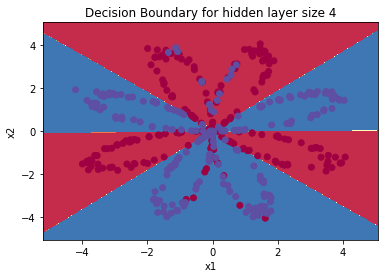

In [147]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [148]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 90.5 %
Accuracy for 20 hidden units: 91.25 %
Accuracy for 50 hidden units: 90.5 %


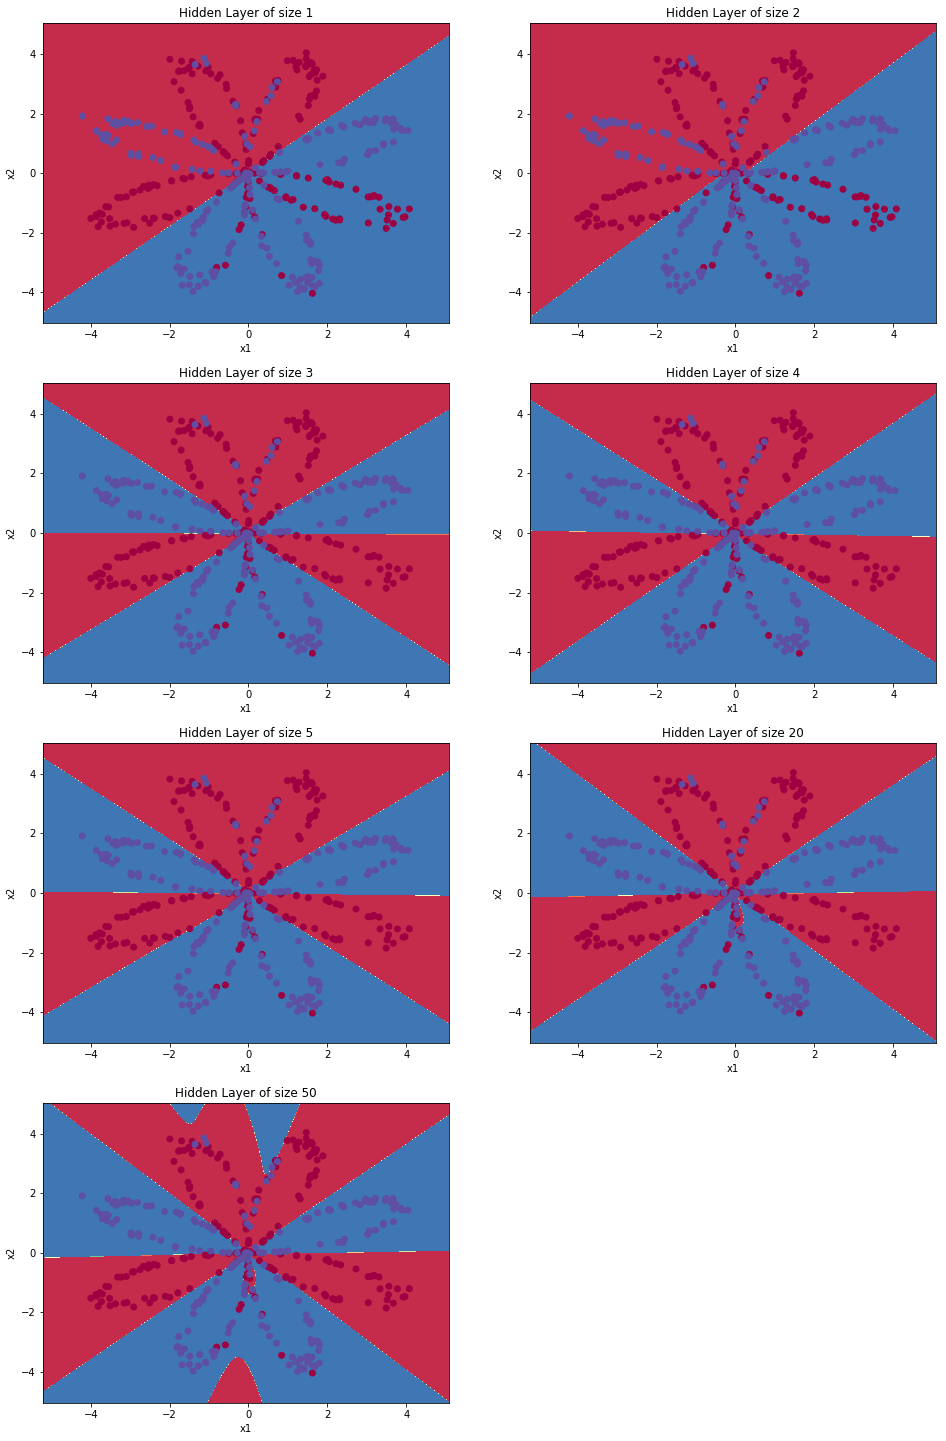

In [149]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

#### 5. Performance on other datasets
If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

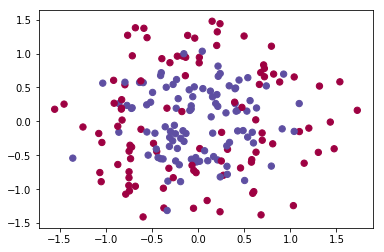

In [153]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_circles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y % 2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);